# Aprendizagem de Máquina I

## Hugo Tremonte de Carvalho

#### hugo@dme.ufrj.br

NOMES: 
* ALUNO/A 1
* ALUNO/A 2

Este _notebook_ é correspondente ao nosso primeiro projeto, passado no dia 22/08/2024 e para entrega no dia 19/09/2024. Ele consiste em questões teóricas e questões práticas. A entrega da atividade deve ser feita através do Google Classroom, fazendo um _upload_ deste _notebook_, devidamente atualizado com as suas resoluções e implementações. Recomendo fortemente que façam o trabalho no Google Colab, pois assim temos certa garantia de estarmos rodando tudo no mesmo ambiente e que eu conseguir executar o código de vocês sem dificuldades.

A resolução das questões teóricas pode ser feita de duas formas:
* Escrita em $\LaTeX$ aqui no próprio Google Colab
* Escrita à mão, escaneada de modo legível, e feito o upload no Google Classroom.

A primeira alternativa é mais recomendada, por deixar o trabalho mais organizado, e cá entre nós, estar tudo em um documento só me facilita a correção! :-) mas para quem não tem fluência com $\LaTeX$ ou prefere fazer à mão, a segunda alternativa está aí. Obviamente que não haverá punição nenhuma meramente por conta da escolha de sua preferência.

O projeto poderá ser feito **até** em dupla: quem quer fazer sozinho/a faz, mas quem quiser fazer em dupla também tem esse direito.

## Parte prática

### 1) Regressão linear múltipla

Resolva o exercício 9 da Sec. 3.7 do Cap. 3 de [ITSL].

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from ISLP import load_data

In [3]:
auto_df = load_data("Auto")

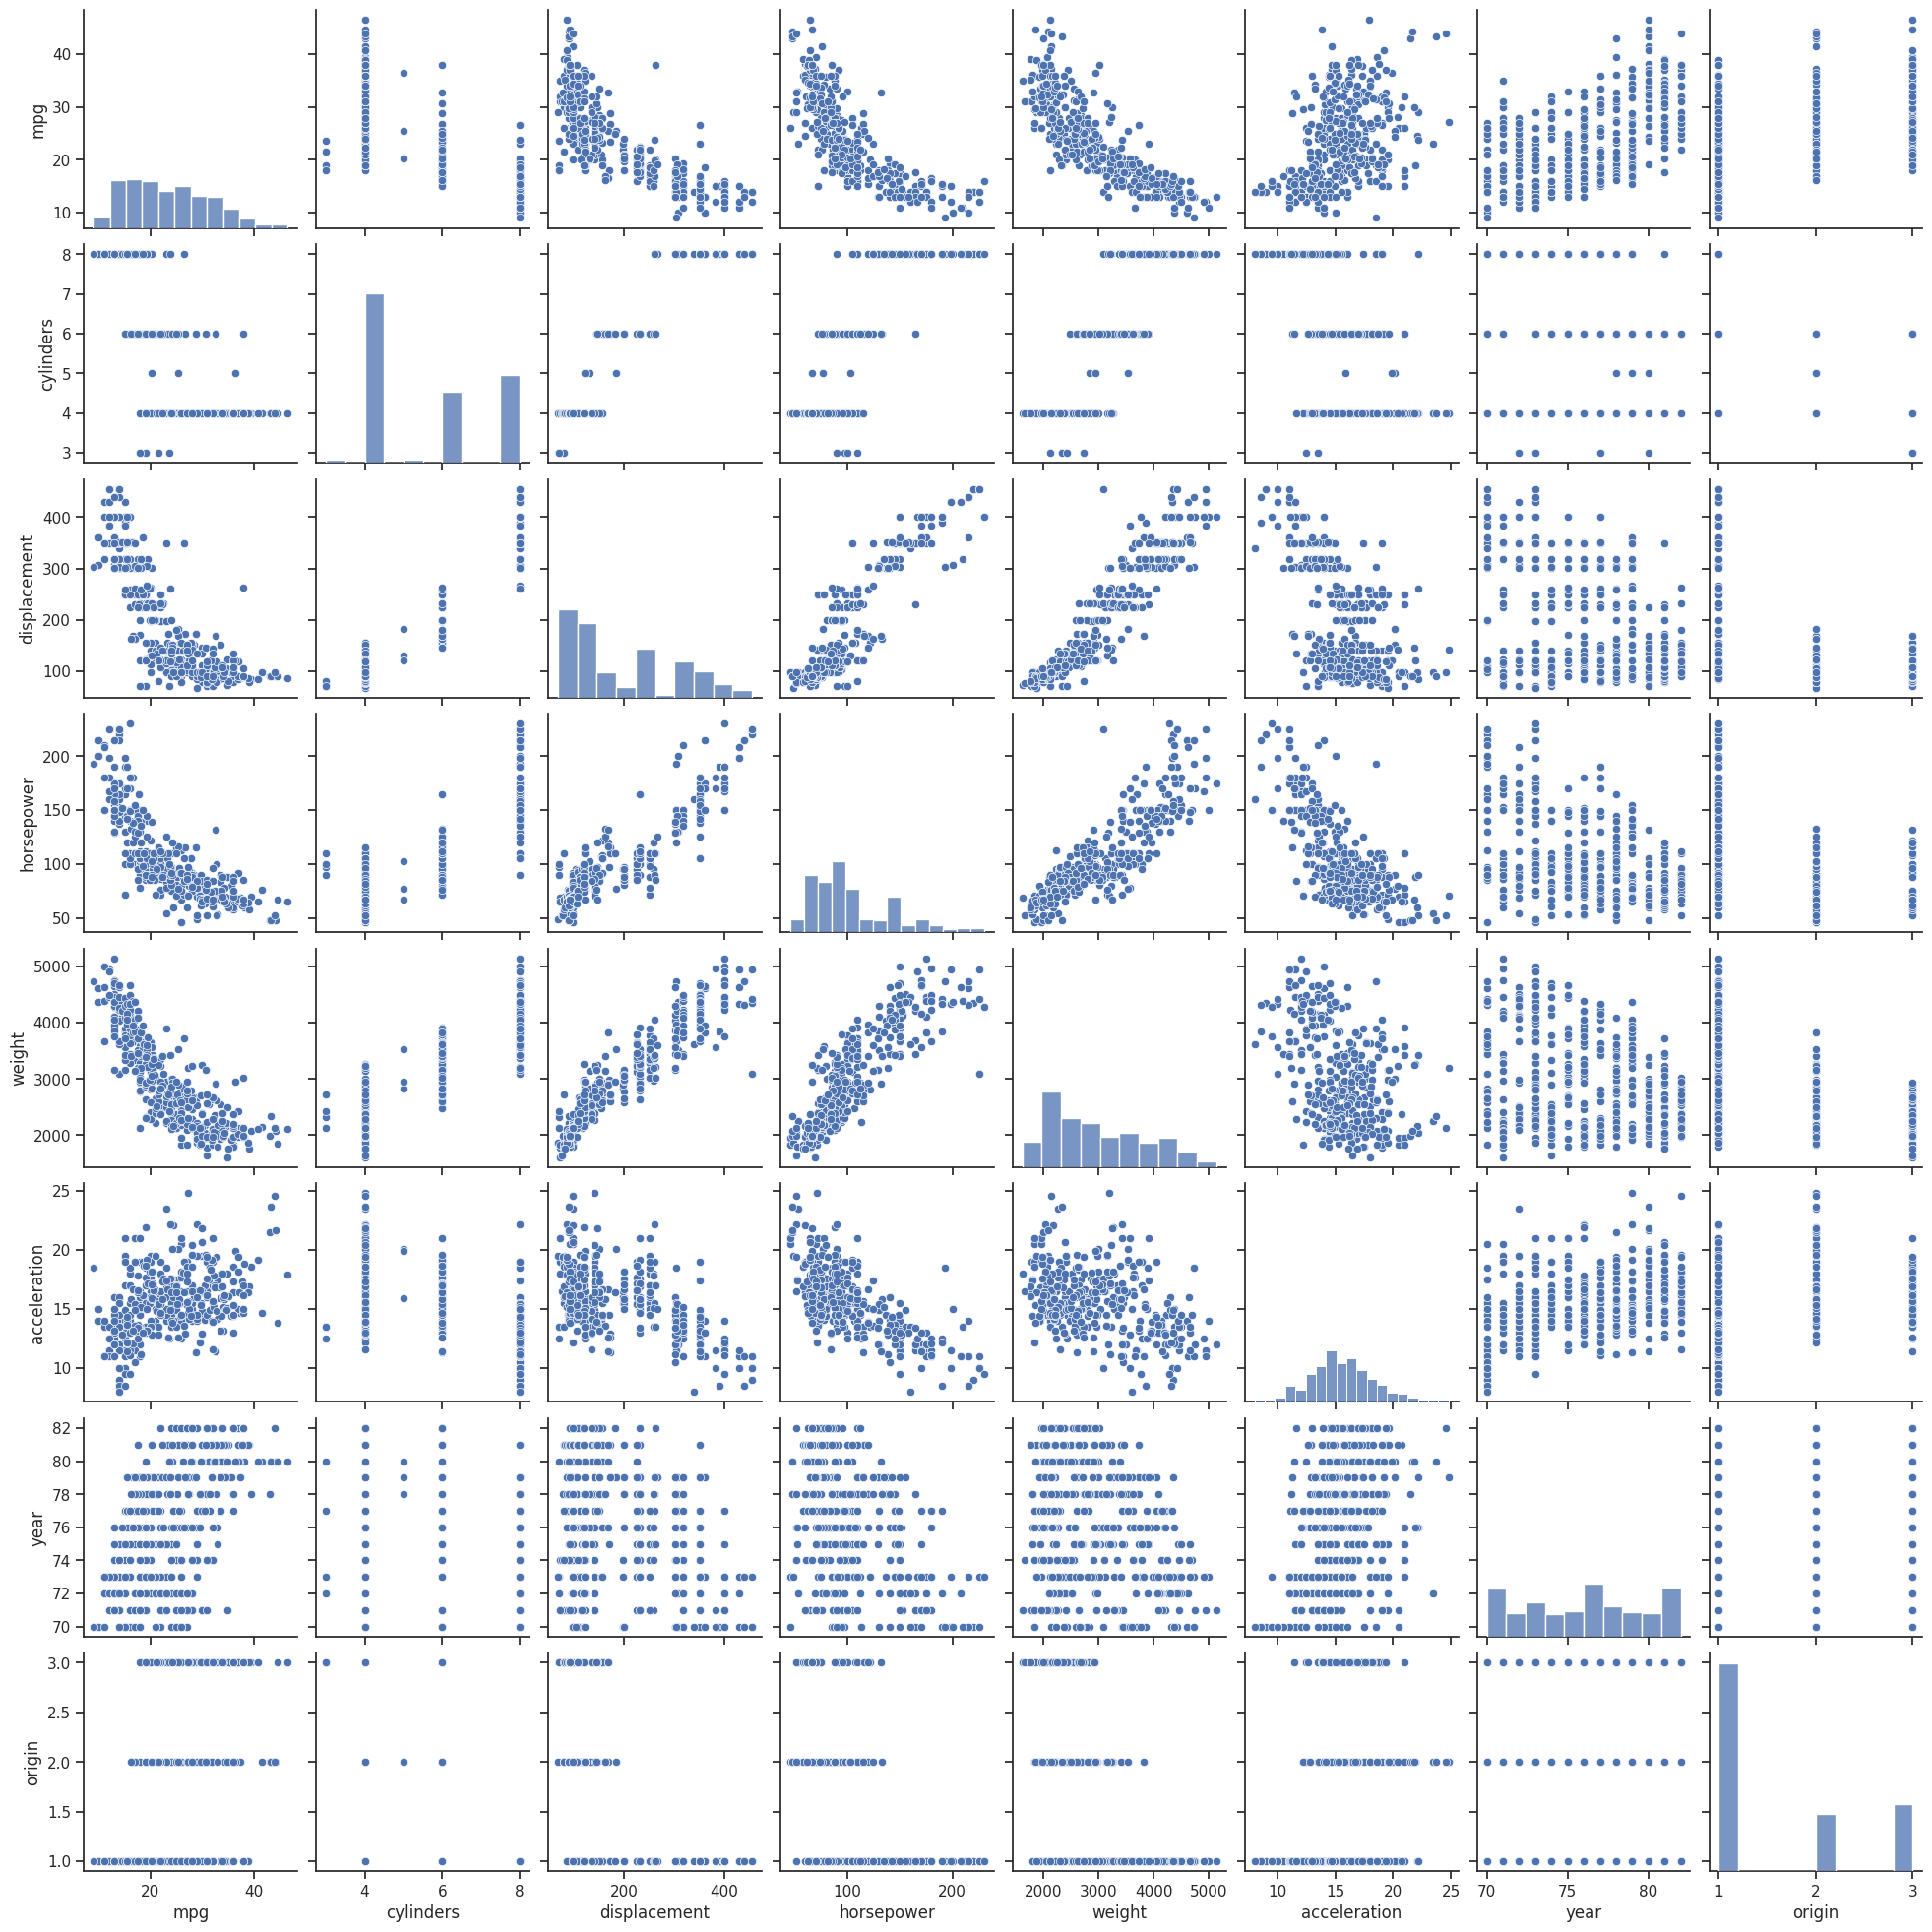

In [5]:
sns.set_theme(style="ticks")
sns.pairplot(auto_df)

### 2) Seleção de variáveis

Resolva o exercício 10 da Sec. 6.6 do Cap. 6 de [ITSL]. Explique o que é o *best subset selection*, invocado no item c).

Obs.: Esse exercício é parecido com o que fizemos em uma aula prática, porém ele tem algumas perguntinhas adicionais. Para fazê-lo, você precisará ver o que é o *best subset selection*, que é apresentado na pág. 231. Claro, use o código que desenvolvemos em sala de aula como ponto de partida para a geração dos dados sintéticos.

In [2]:
#Solução

## Parte teórica

### 3) Regularização em regressão linear - soluções analíticas

No vídeo em anexo nessa atividade nós encontramos a solução analítica do problema de regressão linear através da minimização da seguinte função, em relação à variável $\boldsymbol{\beta}$: $$\|\mathbf{X}\boldsymbol{\beta} - \mathbf{y}\|^2,$$
onde $\mathbf{X}$ é uma matriz de tamanho $n \times p$ contendo os atributos observados ($n$ é a quantidade de observações e $p$ é a quantidade de atributos do modelo), $\boldsymbol{\beta}$ é um vetor de tamanho $p \times 1$ contendo os coeficientes da regressão e $\mathbf{y}$ é um vetor de tamanho $n \times 1$ contendo as respostas observadas. Para simplificar, note que **não** estamos levando em conta o intercepto no problema de regressão, de modo que **todas** as colunas de $\mathbf{X}$ representam atributos observados. Em particular, a primeira coluna da matriz $\mathbf{X}$ **não** é necessariamente preenchida com $1$'s.

O objetivo dessa questão é estudar o que acontece com a solução analítica do Lasso e da regressão Ridge. Para simplificar, assuma que a matriz $\mathbf{X}$ têm colunas ortonormais, de modo que $\mathbf{X}^T\mathbf{X} = \mathbf{I}_p$, onde $\mathbf{I}_p$ é a matriz identidade de tamanho $p \times p$. Com base nisso, faça o que se pede abaixo.

*   a) Encontre a solução analítica da regressão Ridge, minimizando em relação à variável $\boldsymbol{\beta}$ a função: $$\|\mathbf{X}\boldsymbol{\beta} - \mathbf{y}\|^2 + \lambda\|\boldsymbol{\beta}\|_2^2.$$ A mesma estratégia que fizemos em sala para a regressão sem penalização funciona aqui. Note que como não estamos considerando o intercepto na regressão, **todas** as entradas de $\boldsymbol{\beta}$ são penalizadas.

-- sua resolução aqui --

*   b) Encontre a solução analítica da regressão Lasso, minimizando em relação à variável $\boldsymbol{\beta}$ a função: $$\|\mathbf{X}\boldsymbol{\beta} - \mathbf{y}\|^2 + \lambda\|\boldsymbol{\beta}\|_1.$$ Note que como a penalização não é uma função derivável, o procedimento usado no item a) pode não funcionar, de modo que outra alternativa deve ser buscada.

-- sua resolução aqui --

*   c) À luz do que foi reportado nos itens anteriores, compare as soluções analíticas da regressão linear sem penalização, com penalização Ridge e com penalização Lasso.

-- sua resolução aqui --

*   d) Estude o *help* das funções `LinearRegression`, `Lasso`, `Ridge` e `ElasticNet` no `scikit-learn` e reporte que problemas de otimização eles resolvem. Eles são idênticos aos que você resolveu aqui na teoria ou são diferentes? Caso sejam diferentes, tente justificar a diferença observada.

-- sua resolução aqui --

### 4) Relacionando "encontrar o melhor preditor" com "estimando bem a função de regressão"

Em sala de aula fizemos uma prova parcial (seguida da interpretação) do teorema apresentado como "Teorema 1" na Seção 1.4 de [AME] (pág. 10). Prove rigorosamente esse resultado.

Obs.: Note que a prova apresentada em [AME] é bastante sucinta, e não fica tão claro em relação a quem estão sendo tomadas as esperanças. Deixe isso claro na sua demonstração.

### 5) O balanço entre viés e variância (questão bônus)

O objetivo dessa questão é tornar rigorosa e provar a equação do balanço entre viés e variância. Para isso, siga os passos indicados abaixo.

Obs.: Cristopher Bishop em "Pattern Recognition and Machine Learning", Sec. 3.2 (pág. 147) dá alguns vagos indícios de como fazer essa conta.

Obs².: Eu sei que essa questão é "emocionante". Me lembro que demorei um bom tempo até conseguir desmembrar a conta e chegar nesse passo-a-passo. Qualquer dificuldade, não hesitem em perguntar!

a) Assuma que a relação entre $Y \in \mathbb{R}$ e $\mathbf{X} \in \mathbb{R}^p$ é dada por $Y = f(\mathbf{X}) + \varepsilon$, onde a função $f: \mathbb{R}^p \to \mathbb{R}$ é desconhecida e $\varepsilon$ é um erro de média zero, independente de $\mathbf{X}$. Denote por $\hat{f}$ uma estimativa de $f$ e assuma que $\mathbf{X}$ e $Y$ sigam uma distribuição conjunta cuja densidade é dada por $p(\mathbf{x}, y)$. Mostre que a "melhor" possível estimativa (no sentido de minimizar a função custo quadrática) é dada por $\hat{f}_{\mathrm{opt}}(\mathbf{x}) = \mathbb{E}_Y[Y | \mathbf{X} = \mathbf{x}]$. Para isso, mostre que o seguinte valor esperado é mínimo quando $\hat{f} = \hat{f}_{\mathrm{opt}}$: $$\mathbb{E}_{\mathbf{X}, Y}[(\hat{f}(\mathbf{X}) - Y)^2] = \iint (\hat{f}(\mathbf{x}) - y)^2 p(\mathbf{x}, y)~d\mathbf{x}dy$$

-- Escreva aqui a sua resolução --

b) Seja agora $\hat{f}$ uma estimativa de $f$ obtida a partir de um determinado conjunto de observações $\mathcal{D}$. Explicitemos tal fato agora escrevendo $\hat{f}(\mathbf{x})$ como $\hat{f}(\mathbf{x}; \mathcal{D})$. Fixe $\mathbf{x}$ e considere a distância quadrática entre $\hat{y} = \hat{f}(\mathbf{x}; \mathcal{D})$ e sua "melhor" previsão possível, ou seja, $(\hat{f}(\mathbf{x}; \mathcal{D}) - \hat{f}_{\mathrm{opt}}(\mathbf{x}))^2$. Mostre que o valor esperado de tal quantidade com respeito a todos os possívels conjuntos de dados é dada por

$$\mathbb{E}_{\mathcal{D}}[(\hat{f}(\mathbf{x}; \mathcal{D}) - \hat{f}_{\mathrm{opt}}(\mathbf{x}))^2] = (\mathbb{E}_{\mathcal{D}}[\hat{f}(\mathbf{x}; \mathcal{D})] - \hat{f}_{\mathrm{opt}}(\mathbf{x}))^2 - \mathbb{E}_{\mathcal{D}}[(\hat{f}(\mathbf{x}; \mathcal{D}) - \mathbb{E}_{\mathcal{D}}[\hat{f}(\mathbf{x}; \mathcal{D})])^2].$$

Dica: $0 = \mathbb{E}_{\mathcal{D}}[\hat{f}(\mathbf{x}; \mathcal{D})] - \mathbb{E}_{\mathcal{D}}[\hat{f}(\mathbf{x}; \mathcal{D})]$.

Finalmente, argumente que o primeiro desses termos é o que chamamos de "viés" (ao quadrado) e o segundo de "variância".

-- Escreva aqui a sua resolução --

c) Note que o resultado obtido acima é quase o que queremos, a menos do termo sobre a variância do erro de observação. De modo a incorporá-lo, retorne ao item a) e mostre que $\mathbb{E}_{\mathbf{X}, Y}[(\hat{f}(\mathbf{X}) - Y)^2]$ pode ser escrita como $$\mathbb{E}_{\mathbf{X}, Y}[(\hat{f}(\mathbf{X}) - Y)^2] = \int (\hat{f}(\mathbf{x}) - \hat{f}_{\mathrm{opt}}(\mathbf{x}))^2 p(\mathbf{x})~d\mathbf{x} + \iint (\hat{f}_{\mathrm{opt}}(\mathbf{x}) - y)^2 p(\mathbf{x}, y)~d\mathbf{x}dy.$$

Dica: Novamente, $0 = \mathrm{alguma~coisa} - \mathrm{a~mesma~coisa}$. Descubra quem é essa coisa.

-- Escreva aqui a sua resolução --

d) Juntando os resultados dos itens b) e c), conclua que

$$\mathbb{E}_{\mathbf{X}, Y, \mathcal{D}}[(\hat{f}(\mathbf{X}; \mathcal{D}) - Y)^2] = \int (\mathbb{E}_{\mathcal{D}}[\hat{f}(\mathbf{x}; \mathcal{D})] - \hat{f}_{\mathrm{opt}}(\mathbf{x}))^2 p(\mathbf{x})~d\mathbf{x} + \int \mathbb{E}_{\mathcal{D}}[(\hat{f}(\mathbf{x}; \mathcal{D}) - \mathbb{E}_{\mathcal{D}}[\hat{f}(\mathbf{x}; \mathcal{D})])^2] p(\mathbf{x})~d\mathbf{x} + \iint (\hat{f}_{\mathrm{opt}}(\mathbf{x}) - y)^2 p(\mathbf{x}, y)~d\mathbf{x}dy.$$

Para concluir, argumente que o primeiro desses termos é o que chamamos de "viés" (ao quadrado), segundo é a "variância" e o terceiro está relacionado com o ruído inerente das observações.

-- Escreva aqui a sua resolução --